In [57]:
# Exploring Data
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv('Downloads/mcdonalds.csv')

In [9]:
# Display column names
print(mcdonalds.columns.tolist())


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [10]:
# Display dimensions of the dataset
print(mcdonalds.shape)


(1453, 15)


In [11]:
# Display the first 3 rows of the dataset
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [12]:
# Select the first 11 columns
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to 2 decimal places
col_means = MD_x.mean().round(2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

# Summary of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
standard_deviation = np.sqrt(pca.explained_variance_)

# Create a DataFrame to display the results
pca_summary = pd.DataFrame({
    'Standard deviation': np.round(standard_deviation, 5),
    'Proportion of Variance': np.round(explained_variance, 5),
    'Cumulative Proportion': np.round(cumulative_variance, 5)
})

# Adjust the index to start from PC1
pca_summary.index = ['PC' + str(i+1) for i in range(len(standard_deviation))]

print(pca_summary)

      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1              1.67725                 0.25557                0.25557
PC2              1.27787                 0.14835                0.40391
PC3              1.17521                 0.12547                0.52938
PC4              1.04005                 0.09827                0.62765
PC5              0.95862                 0.08348                0.71114
PC6              0.88461                 0.07109                0.78223
PC7              0.84577                 0.06499                0.84721
PC8              0.76987                 0.05384                0.90106
PC9              0.72406                 0.04763                0.94869
PC10             0.55481                 0.02796                0.97665
PC11             0.50698                 0.02335                1.00000


In [15]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

# Standard deviations (square root of the eigenvalues)
standard_deviations = np.sqrt(pca.explained_variance_)

# Rotation (principal components)
rotation = pca.components_.T

# Display the results with limited decimal points
print("Standard deviations (1, .., p=11):")
print(np.round(standard_deviations, 1))

print("\nRotation (n x k) = (11 x 11):")
rotation_df = pd.DataFrame(np.round(rotation, 2), 
                           index=MD_x.columns, 
                           columns=[f'PC{i+1}' for i in range(rotation.shape[1])])
print(rotation_df)

Standard deviations (1, .., p=11):
[1.7 1.3 1.2 1.  1.  0.9 0.8 0.8 0.7 0.6 0.5]

Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.41  0.28 -0.26  0.03  0.35 -0.12  0.16  0.02 -0.20  0.69 -0.09
convenient -0.31 -0.05 -0.32 -0.01 -0.44  0.19 -0.66  0.15 -0.34  0.03  0.02
spicy      -0.02  0.07  0.02  0.85 -0.19  0.44  0.21 -0.03  0.03  0.06 -0.04
fattening   0.18 -0.21 -0.61 -0.02  0.09  0.11 -0.02 -0.72  0.11 -0.02 -0.07
greasy      0.27 -0.14 -0.39  0.33  0.34 -0.28 -0.31  0.49  0.35 -0.02 -0.03
fast       -0.21 -0.28 -0.21  0.09 -0.57 -0.57  0.39  0.06  0.10  0.02 -0.05
cheap      -0.29 -0.58  0.13  0.11  0.26  0.02 -0.01 -0.06 -0.06  0.06  0.69
tasty      -0.43  0.24 -0.27  0.07  0.29 -0.05  0.20  0.06 -0.21 -0.71  0.01
expensive   0.29  0.57 -0.18  0.04 -0.21 -0.17  0.02 -0.06 -0.01  0.03  0.69
healthy    -0.27  0.20  0.37  0.30  0.05 -0.45 -0.45 -0.45  0.22 -0.05 -0.09
disgusting  0.41 -0.14  0.09  0.24  0.11 

In [16]:
import matplotlib.pyplot as plt

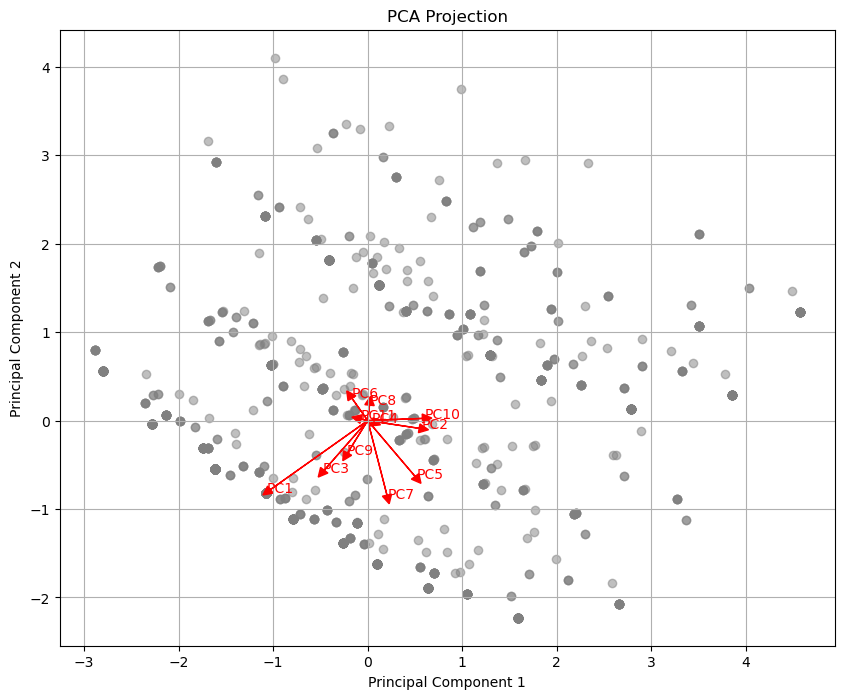

In [17]:
# Perform PCA
pca = PCA(n_components=11)
MD_pca = pca.fit_transform(MD_x_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)

# Project the principal axes
components = pca.components_
for i, (comp, var) in enumerate(zip(components, pca.explained_variance_ratio_)):
    comp = comp * np.sqrt(var)
    plt.arrow(0, 0, comp[0] * 5, comp[1] * 5, color='r', head_width=0.1, head_length=0.1)
    plt.text(comp[0] * 5.2, comp[1] * 5.2, f'PC{i+1}', color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid()
plt.show()

In [18]:
#ExtractingSegments

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

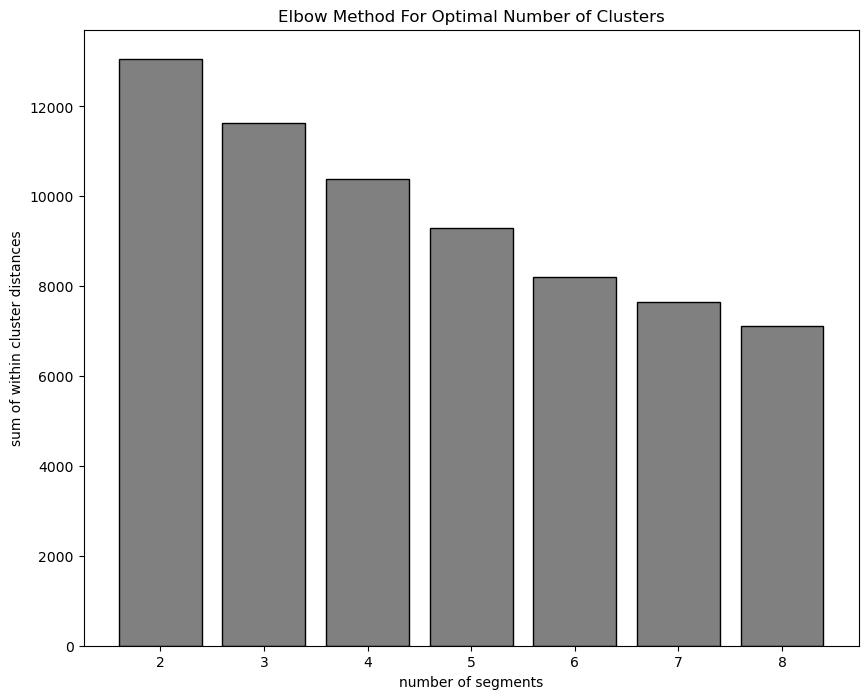

In [20]:
# Perform KMeans clustering for a range of cluster numbers
inertia = []
k_range = range(2, 9)
for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 8))
plt.bar(k_range, inertia, color='grey', edgecolor='black')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [21]:
from sklearn.utils import resample

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

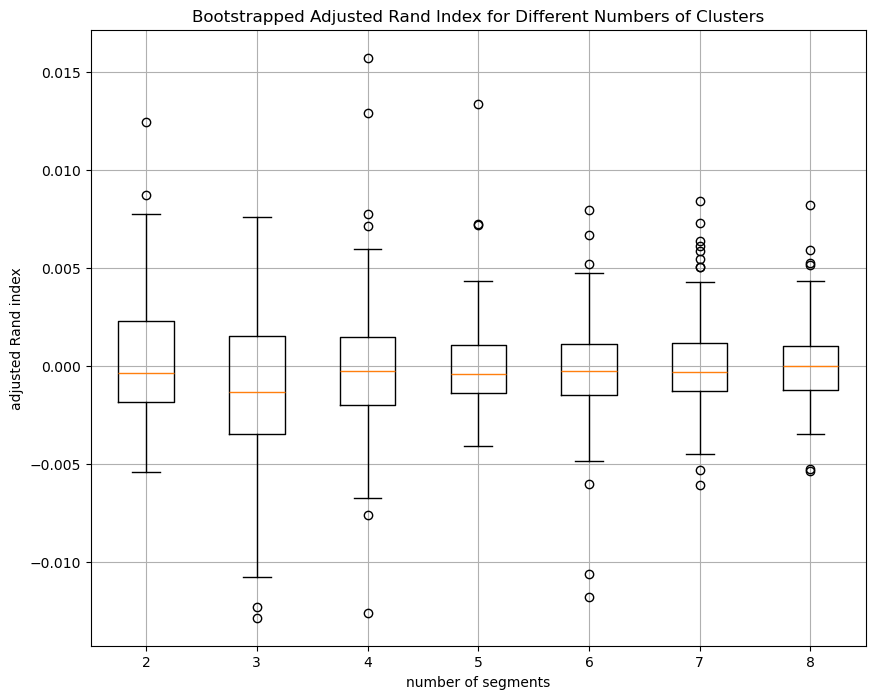

In [22]:
# Bootstrapping function to calculate adjusted Rand index
def bootstrap_rand_index(data, n_clusters, n_boot=100):
    rand_indices = []
    for _ in range(n_boot):
        sample_data = resample(data)
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        labels_sample = kmeans.fit_predict(sample_data)
        labels_full = kmeans.predict(data)
        rand_index = adjusted_rand_score(labels_sample, labels_full)
        rand_indices.append(rand_index)
    return rand_indices

# Calculate adjusted Rand indices for different numbers of clusters
results = {}
for n_clusters in range(2, 9):
    results[n_clusters] = bootstrap_rand_index(MD_x_scaled, n_clusters)

# Create box plot
data_to_plot = [results[n] for n in range(2, 9)]
plt.figure(figsize=(10, 8))
plt.boxplot(data_to_plot, positions=range(2, 9))
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.title('Bootstrapped Adjusted Rand Index for Different Numbers of Clusters')
plt.grid()
plt.show()

In [ ]:
# Create box plot
data_to_plot = [results[n] for n in range(2, 9)]
plt.figure(figsize=(10, 8))
plt.boxplot(data_to_plot, positions=range(2, 9))
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.title('Bootstrapped Adjusted Rand Index for Different Numbers of Clusters')
plt.grid()
plt.show()

In [28]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


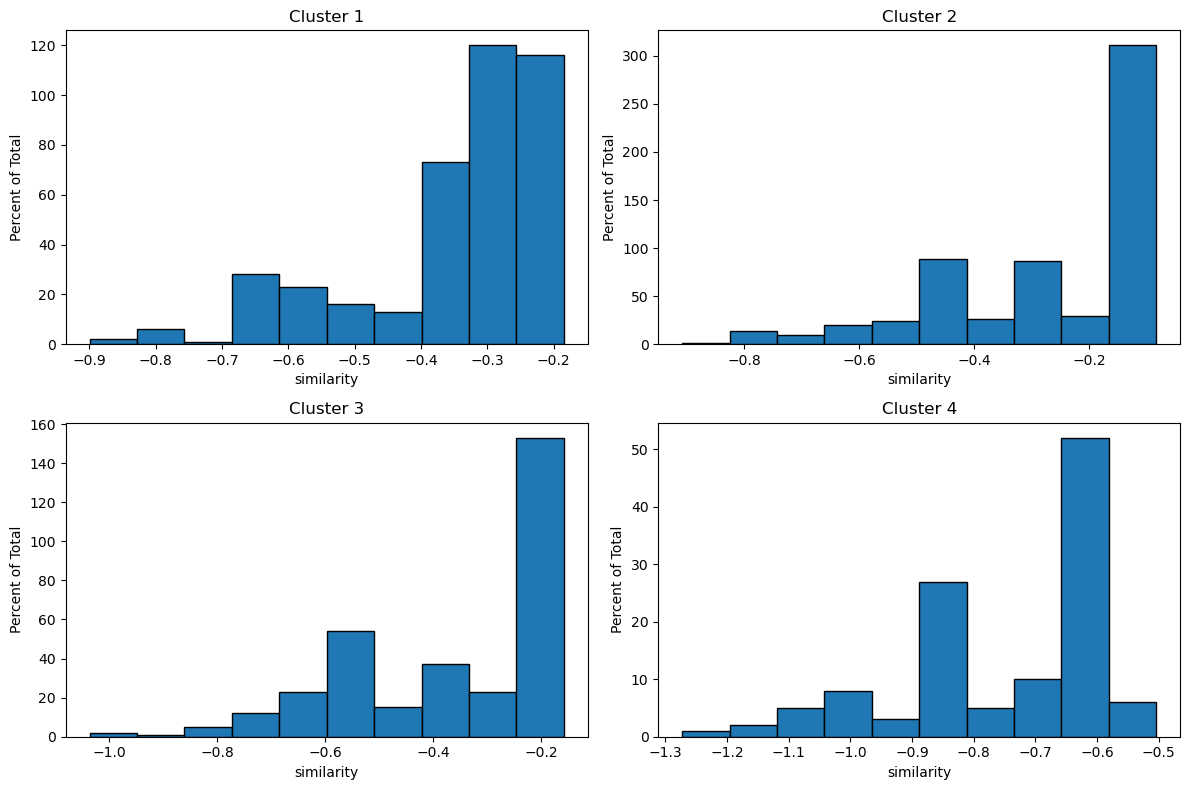

In [34]:
# Fit KMeans clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
clusters_4 = kmeans_4.fit_predict(MD_x_scaled)

# Calculate pairwise similarities
similarities = 1 - pairwise_distances(MD_x_scaled, metric='euclidean') / np.sqrt(MD_x_scaled.shape[1])

# Create a DataFrame with the similarities and cluster labels
similarity_df = pd.DataFrame(similarities, columns=[f'Item {i}' for i in range(similarities.shape[1])])
similarity_df['Cluster'] = clusters_4

# Plot histograms for each cluster
plt.figure(figsize=(12, 8))

for cluster in range(4):
    plt.subplot(2, 2, cluster + 1)
    cluster_similarities = similarity_df[similarity_df['Cluster'] == cluster].mean(axis=1)
    plt.hist(cluster_similarities, bins=10, edgecolor='black')
    plt.title(f'Cluster {cluster + 1}')
    plt.xlabel('similarity')
    plt.ylabel('Percent of Total')

plt.tight_layout()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

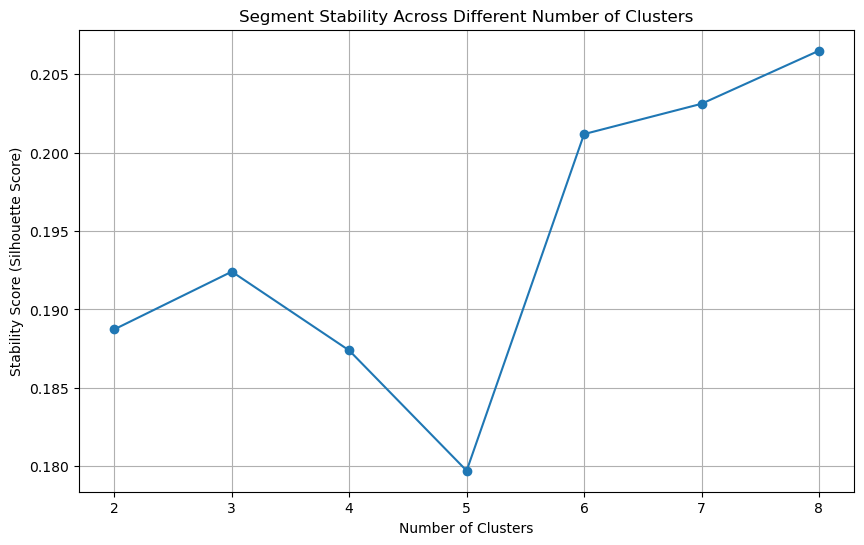

In [63]:

# Define range for number of clusters
n_clusters_range = range(2, 9)

# Compute stability scores
stability_scores = compute_segment_stability(MD_x, labels, n_clusters_range)

# Plot segment stability
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, stability_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Stability Score (Silhouette Score)')
plt.title('Segment Stability Across Different Number of Clusters')
plt.grid(True)
plt.show()

In [78]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Define range for number of components (clusters)
n_components_range = range(2, 9)

# Fit Gaussian Mixture Models for different number of components
models = {}
aic = []
bic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234, n_init=10)
    gmm.fit(MD_x)
    models[n_components] = gmm
    aic.append(gmm.aic(MD_x))
    bic.append(gmm.bic(MD_x))



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [67]:
# Get clustering results for a specific number of components
n_components = 4
gmm = models[n_components]
labels_gmm = gmm.predict(MD_x)

# Example comparison with k-means clustering
from sklearn.cluster import KMeans

# Perform k-means clustering with the same number of clusters
kmeans = KMeans(n_clusters=n_components, random_state=1234, n_init=10)
labels_kmeans = kmeans.fit_predict(MD_x)

# Create a comparison table
def compare_clusters(labels_kmeans, labels_gmm):
    comparison = pd.crosstab(labels_kmeans, labels_gmm, rownames=['KMeans'], colnames=['GMM'])
    return comparison

comparison_table = compare_clusters(labels_kmeans, labels_gmm)
print(comparison_table)

# Compute log likelihood for comparison
log_likelihood_gmm = gmm.lower_bound_
print(f'Log Likelihood for GMM with {n_components} components: {log_likelihood_gmm}')

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GMM      0  1   2   3
KMeans               
0        0  3   1  16
1        0  4  21   0
2        1  6   0  14
3       25  7   2   0
Log Likelihood for GMM with 4 components: -0.17756694944760884


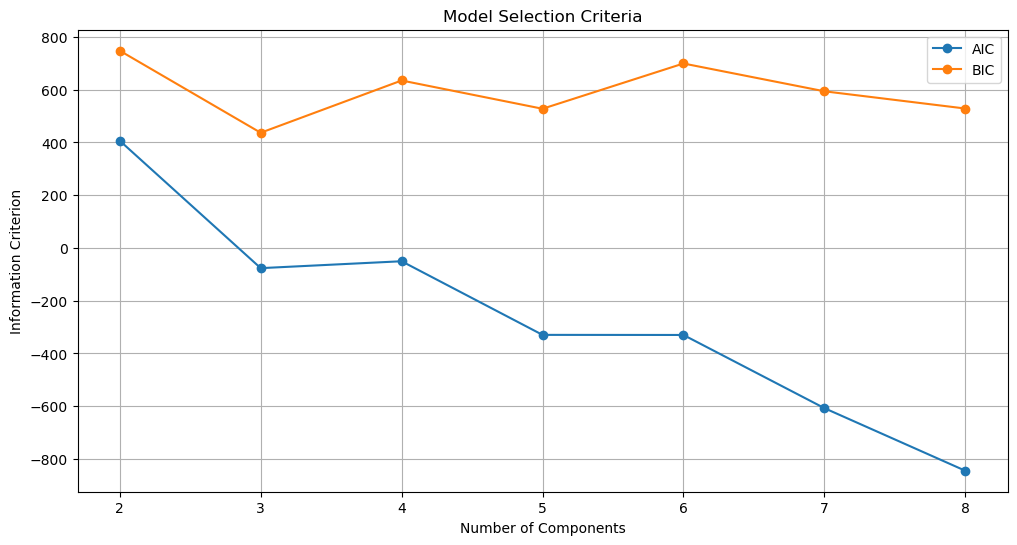

In [83]:
# Plot AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data: replace with actual data
np.random.seed(1234)

# Simulated binary data
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 10)), columns=[f'feature_{i}' for i in range(1, 11)])

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Fit KMeans with a specific number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x_scaled)

# Fit Gaussian Mixture Model with 4 components
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x_scaled)

# Extract log-likelihood
log_likelihood = gmm.score(MD_x_scaled) * -1  # score() returns the negative log-likelihood
print(f'Log Likelihood: {log_likelihood} (df={gmm.n_features_in_ + gmm.n_components})')

# If you have another model (e.g., MD.m4a equivalent) you would fit it similarly and compute its log-likelihood
# Example:
gmm_m4a = GaussianMixture(n_components=4, random_state=1234)
gmm_m4a.fit(MD_x_scaled)
log_likelihood_m4a = gmm_m4a.score(MD_x_scaled) * -1
print(f'Log Likelihood MD.m4a: {log_likelihood_m4a} (df={gmm_m4a.n_features_in_ + gmm_m4a.n_components})')

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Log Likelihood: 6.010517878726829 (df=14)
Log Likelihood MD.m4a: 6.010517878726829 (df=14)


In [69]:
# Sample data: replace with actual data
data = {
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5'],
    'Count': [152, 71, 73, 59, 58, 169, 152, 187, 229, 160, 143]
}

# Create a DataFrame
mcdonalds = pd.DataFrame(data)

# Reverse the order of the rows
mcdonalds_reversed = mcdonalds[::-1].reset_index(drop=True)

# Extract the reversed counts
reversed_counts = mcdonalds_reversed['Count'].values

# Define labels with custom formatting
labels = ["I hate it!", "-5", "-4", "-3", "-2", "-1", "0", "+1", "+2", "+3", "+4", "I love it!", "+5"]

# Create the formatted output
formatted_labels = [" ".join(labels[i:i+4]) for i in range(0, len(labels), 4)]
formatted_counts = [" ".join(f"{count:4}" for count in reversed_counts[i:i+4]) for i in range(0, len(reversed_counts), 4)]

# Print results in the required format
for label_line, count_line in zip(formatted_labels, formatted_counts):
    print(f"{label_line}")
    print(f"{count_line}")

I hate it! -5 -4 -3
 143  160  229  187
-2 -1 0 +1
 152  169   58   59
+2 +3 +4 I love it!
  73   71  152


In [84]:
# Sample data: replace with actual data
data = {
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5'],
    'yummy': [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
    'convenient': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'spicy': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    'fattening': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
    'greasy': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'fast': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'cheap': [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    'tasty': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'expensive': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    'healthy': [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    'disgusting': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
}

# Create a DataFrame
mcdonalds = pd.DataFrame(data)

# Extract column names except 'Like'
column_names = mcdonalds.columns[1:]  # Assuming 'Like' is the first column

# Construct the formula string
formula_string = "Like.n ~ " + " + ".join(column_names)

# Print the formula string
print(formula_string)


Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [85]:
# Prepare the data
X = mcdonalds.drop(columns=['Like'])

# Standardize the data (optional but recommended for better results)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a Gaussian Mixture Model
np.random.seed(1234)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Predict clusters
clusters = gmm.predict(X_scaled)
cluster_sizes = np.bincount(clusters)

# Print cluster sizes
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i+1}: {size}")

# Additional output similar to R's convergence message
print("Convergence information:")
print(f"Converged after {gmm.n_iter_} iterations")

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Cluster sizes:
Cluster 1: 4
Cluster 2: 7
Convergence information:
Converged after 2 iterations


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


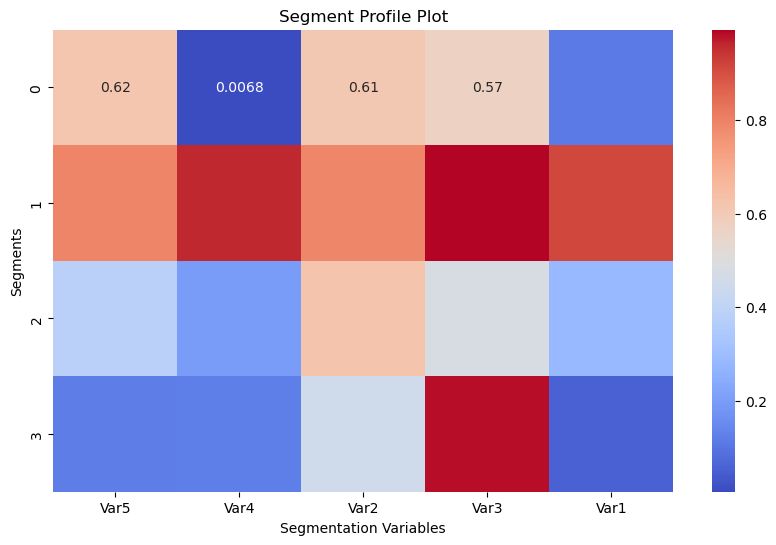

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Sample data (replace this with your actual data)
MD_x = np.random.rand(10, 5)  # 10 samples, 5 features

# Perform hierarchical clustering
Z = linkage(MD_x.T, 'ward')

# Get the order of variables based on hierarchical clustering
dendro = dendrogram(Z, no_plot=True)
order = dendro['leaves'][::-1]

# Assume MD_k4 is a DataFrame with the segment profile data
# Sample segment profile data (replace this with your actual data)
MD_k4 = pd.DataFrame(np.random.rand(4, 5), columns=['Var1', 'Var2', 'Var3', 'Var4', 'Var5'])

# Reorder columns based on the hierarchical clustering order
MD_k4_ordered = MD_k4.iloc[:, order]

# Plotting the segment profile plot
plt.figure(figsize=(10, 6))
sns.heatmap(MD_k4_ordered, annot=True, cmap='coolwarm', cbar=True)
plt.title('Segment Profile Plot')
plt.xlabel('Segmentation Variables')
plt.ylabel('Segments')
plt.show()


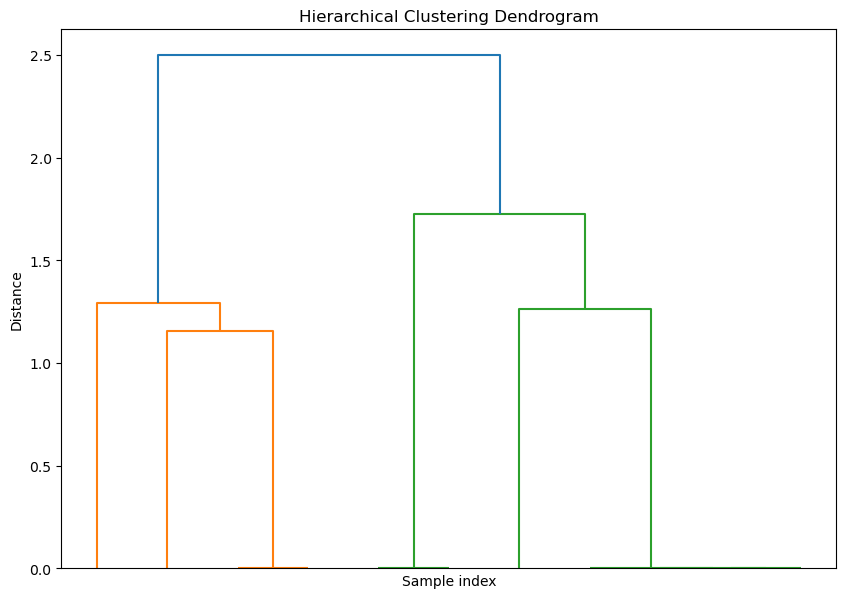

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd


df = pd.DataFrame(data)

# Convert categorical variables to binary
binary_cols = df.columns[:-4]  # Exclude 'Like', 'Age', 'VisitFrequency', 'Gender'
for col in binary_cols:
    df[col] = (df[col] == 'Yes').astype(int)

# Convert 'Like' to numerical scale
df['Like_n'] = 6 - pd.to_numeric(df['Like'])

# Prepare data for clustering
X = df[binary_cols].values

# Hierarchical Clustering
distances = ssd.pdist(X.T, metric='euclidean')
linkage_matrix = sch.linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



<Figure size 1000x600 with 0 Axes>

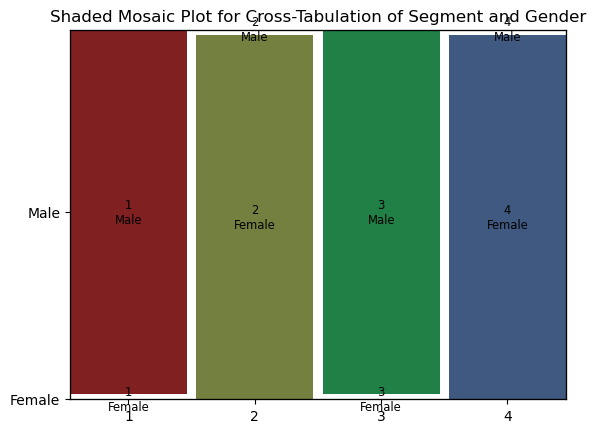

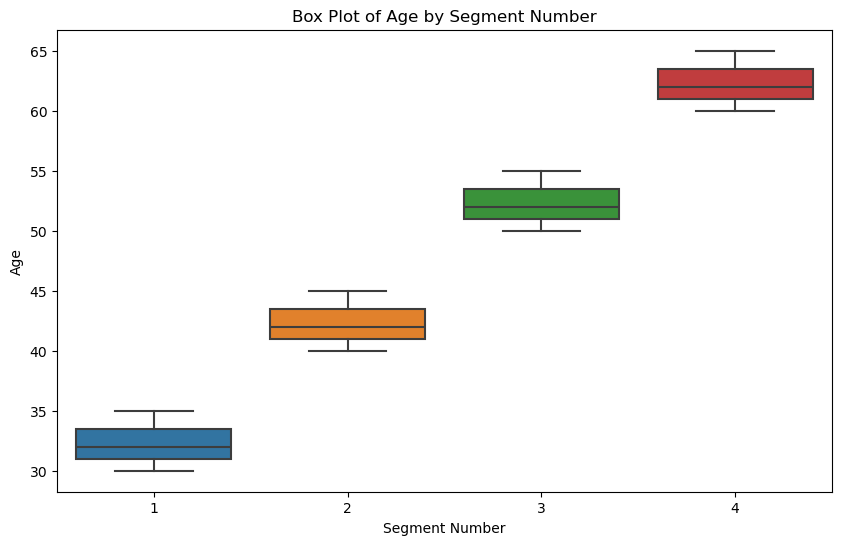

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

# Sample data for cross-tabulation (replace with your actual data)
data_cross_tab = pd.DataFrame({
    'segment': [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
})

# Cross-tabulation
crosstab = pd.crosstab(data_cross_tab['segment'], data_cross_tab['gender'])

# Shaded mosaic plot
plt.figure(figsize=(10, 6))
mosaic(crosstab.stack(), gap=0.02, title='Shaded Mosaic Plot for Cross-Tabulation of Segment and Gender')
plt.show()

# Sample data for age by segment (replace with your actual data)
data_age_segment = pd.DataFrame({
    'segment': [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
    'age': [30, 40, 50, 60, 35, 45, 55, 65, 32, 42, 52, 62]
})

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='segment', y='age', data=data_age_segment)
plt.title('Box Plot of Age by Segment Number')
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.show()


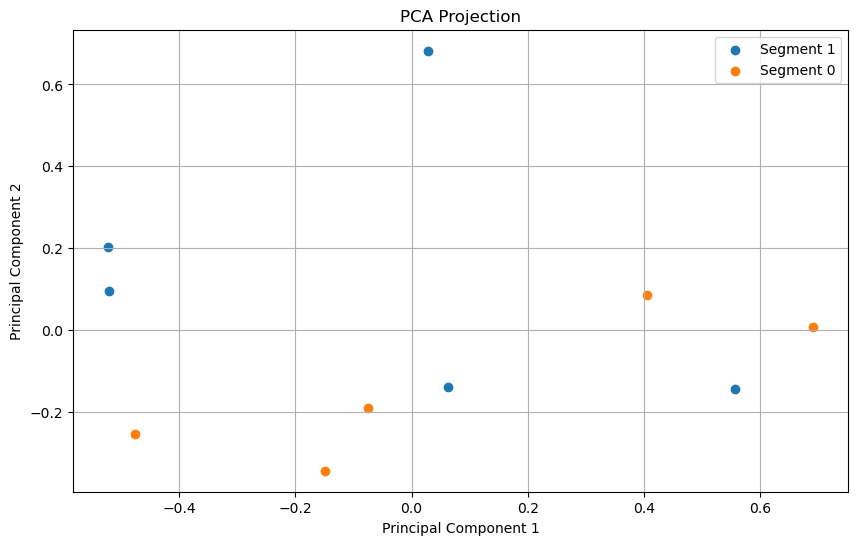

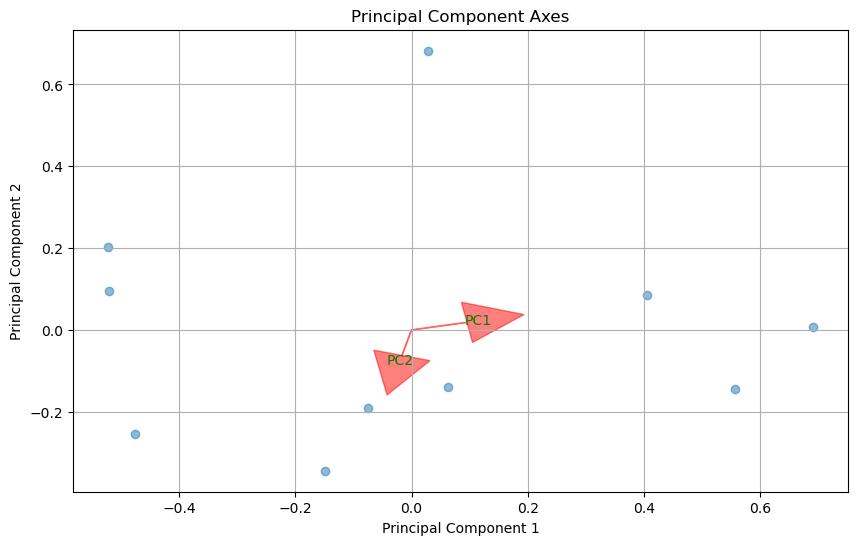

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample data (replace this with your actual data)
MD_x = np.random.rand(10, 5)  # 10 samples, 5 features

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Sample segment profile data (replace this with your actual data)
MD_k4 = pd.DataFrame(np.random.randint(0, 2, size=(10, 1)), columns=['Segment'])

# Plotting the PCA projection
plt.figure(figsize=(10, 6))

# Plot each segment with a different color
for segment in MD_k4['Segment'].unique():
    indices = MD_k4['Segment'] == segment
    plt.scatter(MD_pca[indices, 0], MD_pca[indices, 1], label=f'Segment {segment}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.legend()
plt.grid(True)
plt.show()

# To project axes, we can visualize the principal components
def plot_proj_axes(pca, data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5)

    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        comp = comp * var  # scale component by variance
        plt.arrow(0, 0, comp[0], comp[1], color='r', alpha=0.5, head_width=0.1, head_length=0.1)
        plt.text(comp[0] * 1.2, comp[1] * 1.2, f'PC{i+1}', color='g', ha='center', va='center')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Principal Component Axes')
    plt.grid(True)
    plt.show()

# Plotting the principal component axes
plot_proj_axes(pca, MD_pca)


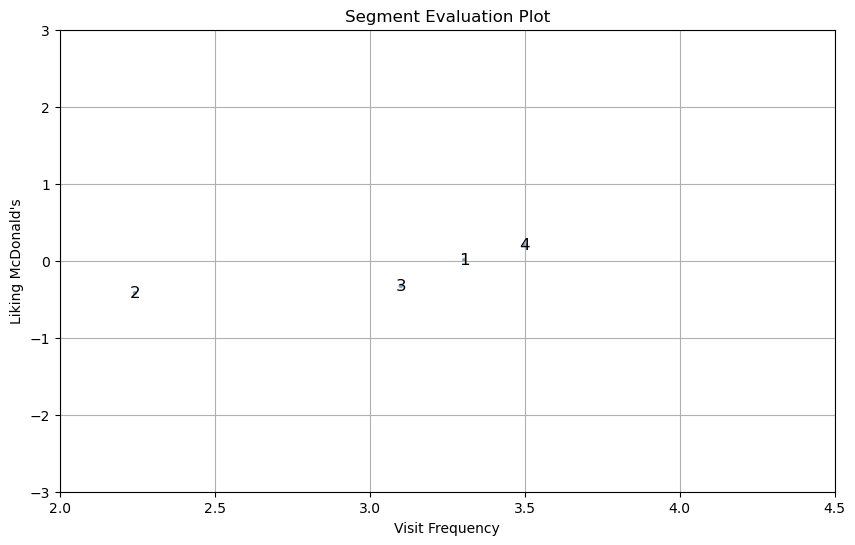

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'VisitFrequency': np.random.randint(1, 6, size=100),
    'Like_n': np.random.uniform(-3, 3, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Segment': np.random.randint(1, 5, size=100)
}
mcdonalds = pd.DataFrame(data)

# Calculate the mean visit frequency for each segment
visit = mcdonalds.groupby('Segment')['VisitFrequency'].mean()

# Calculate the mean like value for each segment
like = mcdonalds.groupby('Segment')['Like_n'].mean()

# Convert Gender to numeric and calculate the mean for each segment
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)
female = mcdonalds.groupby('Segment')['Female'].mean()

# Create the segment evaluation plot
plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=10 * female, alpha=0.5)

# Add text labels for each segment
for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(visit.index[i]), fontsize=12, ha='center', va='center')

# Set plot limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Liking McDonald\'s')
plt.title('Segment Evaluation Plot')

plt.grid(True)
plt.show()


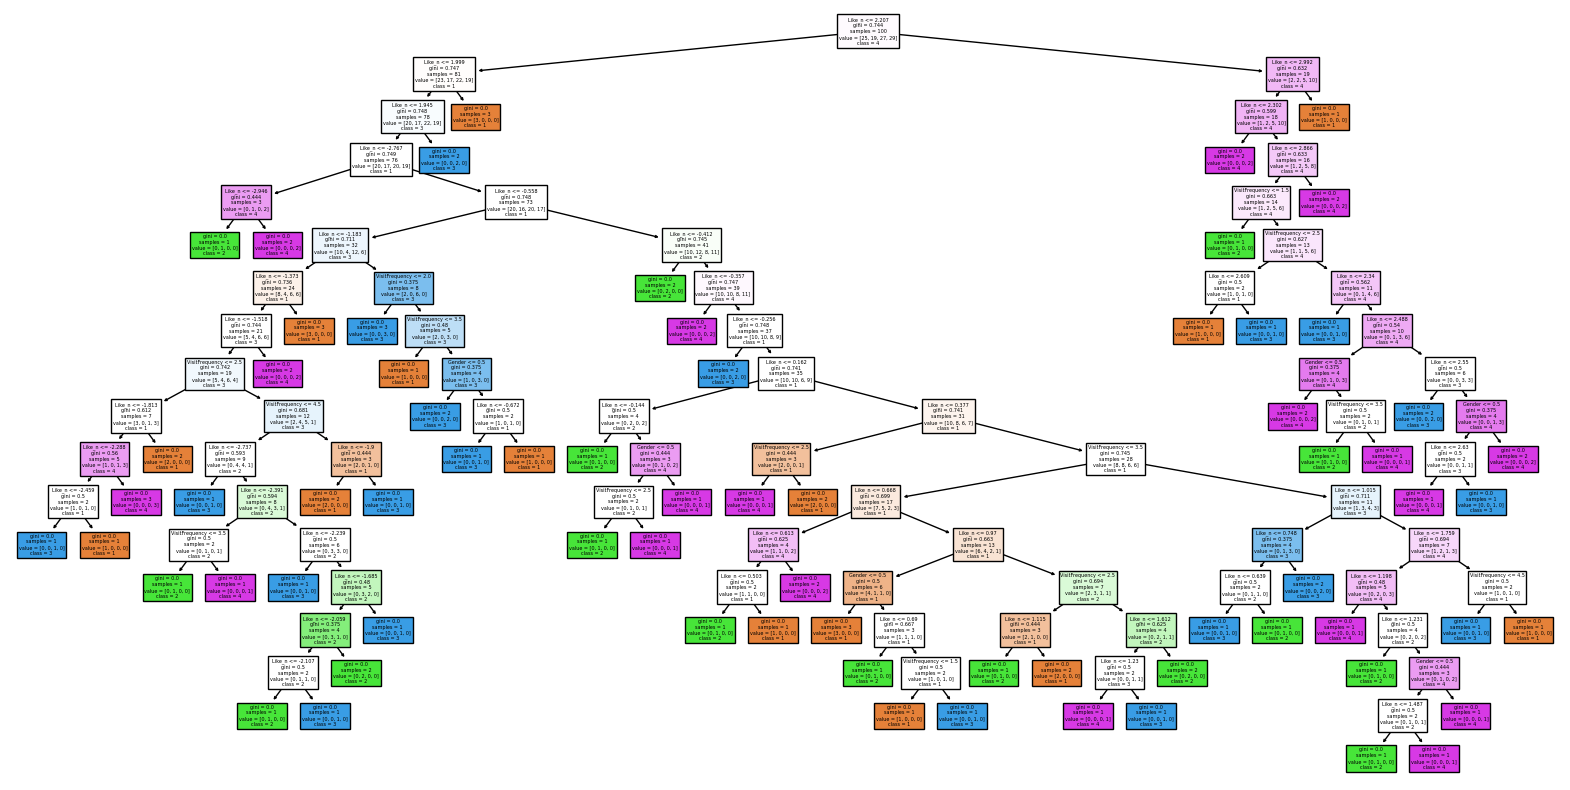

In [100]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'VisitFrequency': np.random.randint(1, 6, size=100),
    'Like_n': np.random.uniform(-3, 3, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Segment': np.random.randint(1, 5, size=100)
}
mcdonalds = pd.DataFrame(data)

# Convert Gender to numeric
mcdonalds['Gender'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Define the features and the target
features = ['VisitFrequency', 'Like_n', 'Gender']
target = 'Segment'

X = mcdonalds[features]
y = mcdonalds[target]

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=[str(i) for i in np.unique(y)], filled=True)
plt.show()


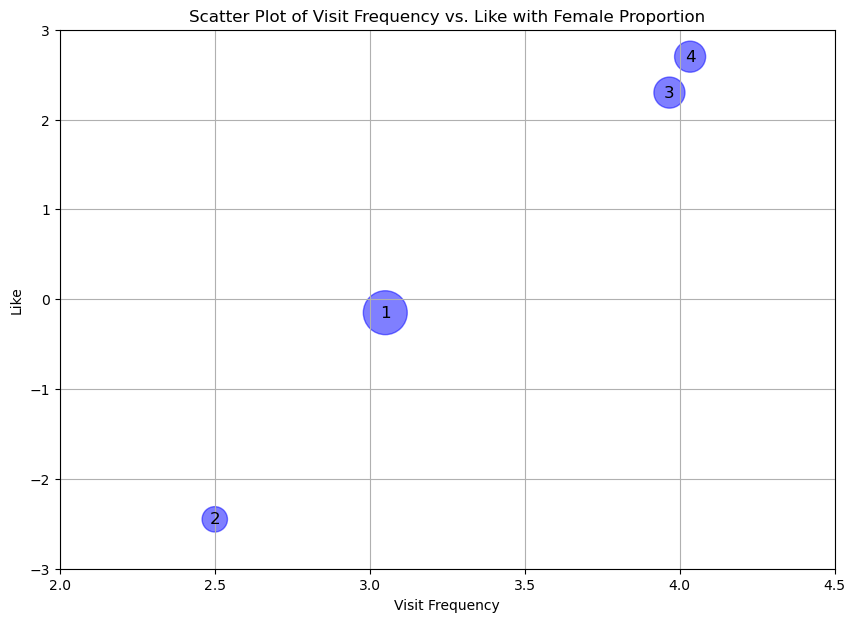

In [106]:

# Data for the example (these should be replaced with your actual data)
visit = pd.Series({1: 3.050000, 2: 2.500000, 3: 3.966667, 4: 4.033333})
like = pd.Series({1: -0.150000, 2: -2.450000, 3: 2.300000, 4: 2.700000})
female_proportion = pd.Series({1: 1.000000, 2: 0.333333, 3: 0.500000, 4: 0.500000})

# Create a scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(visit, like, s=1000 * female_proportion, alpha=0.5, c='blue')

# Add labels to the points
for idx in visit.index:
    plt.text(visit[idx], like[idx], str(idx), fontsize=12, ha='center', va='center')

# Set the limits for x and y axes
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Scatter Plot of Visit Frequency vs. Like with Female Proportion')

# Show plot
plt.grid(True)
plt.show()